# Example notebook for Ensemble of 2D (lon-lat) diagnostic 2-meter temperature 

##### This notebook demonsterates how the ensemble module can be used for 2D (lon-lat) 2 meter temperature data from a single ensemble or multi-model ensemble memebers

In [1]:
import glob
from aqua.diagnostics import EnsembleLatLon
from aqua.diagnostics import retrieve_merge_ensemble_data
from aqua.diagnostics import PlotEnsembleLatLon

In [2]:
# Loading IFS-FESOM and IFS-NEMO 2D maps computed by AQUA diagnostics 
file_list = glob.glob('/work/ab0995/a270260/pre_computed_aqua_analysis/*/historical-1990/atmglobalmean/netcdf/atmglobalmean.statistics_maps.2t.*_historical-1990.nc')
file_list.sort()
# data paths on lumi
# IFS-NEMO: /pfs/lustrep3/projappl/project_465000454/jvonhar/aqua-analysis/output/precomputed_aqua_analysis/IFS-NEMO/historical-1990/atmglobalmean/netcdf/atmglobalmean.statistics_maps.2t.IFS-NEMO_historical-1990.nc
# IFS-FESOM: /pfs/lustrep3/projappl/project_465000454/jvonhar/aqua-analysis/output/precomputed_aqua_analysis/IFS-FESOM/historical-1990/atmglobalmean/netcdf/atmglobalmean.statistics_maps.2t.IFS-FESOM_historical-1990.nc 

In [3]:
file_list

['/work/ab0995/a270260/pre_computed_aqua_analysis/IFS-FESOM/historical-1990/atmglobalmean/netcdf/atmglobalmean.statistics_maps.2t.IFS-FESOM_historical-1990.nc',
 '/work/ab0995/a270260/pre_computed_aqua_analysis/IFS-NEMO/historical-1990/atmglobalmean/netcdf/atmglobalmean.statistics_maps.2t.IFS-NEMO_historical-1990.nc']

In [4]:
# # Without assigning names to the models 
# # merging the dataset along the dimension ens_dim
# # ens_dim="ensemble" name can be changed. 
# # It should remain consistent with the ensemble name for the EnsembleLatLon class variable
# ens_dataset = retrieve_merge_ensemble_data(variable='2t', data_path_list=file_list, log_level = "WARNING",ens_dim="ensemble")

In [5]:
# Assiging names to each model in the following function
# merging the dataset along the dimension ens_dim
# ens_dim="ensemble" name can be changed. 
# It should remain consistent with the ensemble name for the EnsembleLatLon class variable
ens_dataset = retrieve_merge_ensemble_data(variable='2t', model_names= ['IFS-FESOM', 'IFS-NEMO'], data_path_list=file_list, log_level = "WARNING",ens_dim="ensemble")

In [6]:
ens_dataset

<xarray.Dataset> Size: 1MB
Dimensions:   (ensemble: 2, lat: 180, lon: 361)
Coordinates:
  * ensemble  (ensemble) int64 16B 0 1
  * lon       (lon) float64 3kB 0.0 1.0 2.0 3.0 4.0 ... 357.0 358.0 359.0 360.0
  * lat       (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    model     (ensemble) <U9 72B 'IFS-FESOM' 'IFS-NEMO'
Data variables:
    2t        (ensemble, lat, lon) float64 1MB 228.9 228.9 228.9 ... 255.7 255.7
Attributes: (12/23)
    GRIB_paramId:                    167
    long_name:                       2 metre temperature
    GRIB_stepUnits:                  1
    GRIB_gridDefinitionDescription:  150
    GRIB_typeOfLevel:                heightAboveGround
    standard_name:                   air_temperature
    ...                              ...
    GRIB_shortName:                  2t
    GRIB_units:                      K
    GRIB_dataType:                   fc
    model_label:                     IFS-FESOM_historical-1990
    description:                     Dataset merged along ensemble for ensemb...
    model names:                     ['IFS-FESOM', 'IFS-NEMO']

In [7]:
atmglobalmean_ens = EnsembleLatLon(var='2t', dataset=ens_dataset, ensemble_dimension_name="ensemble" )

In [8]:
atmglobalmean_ens.run()

{'mean_plot': [<Figure size 1100x850 with 2 Axes>,
  <GeoAxes: title={'center': 'Map of 2t for Ensemble Multi-Model mean'}, xlabel='Longitude', ylabel='Latitude'>],
 'std_plot': [<Figure size 1100x850 with 2 Axes>,
  <GeoAxes: title={'center': 'Map of 2t for Ensemble Multi-Model standard deviation'}, xlabel='Longitude', ylabel='Latitude'>]}

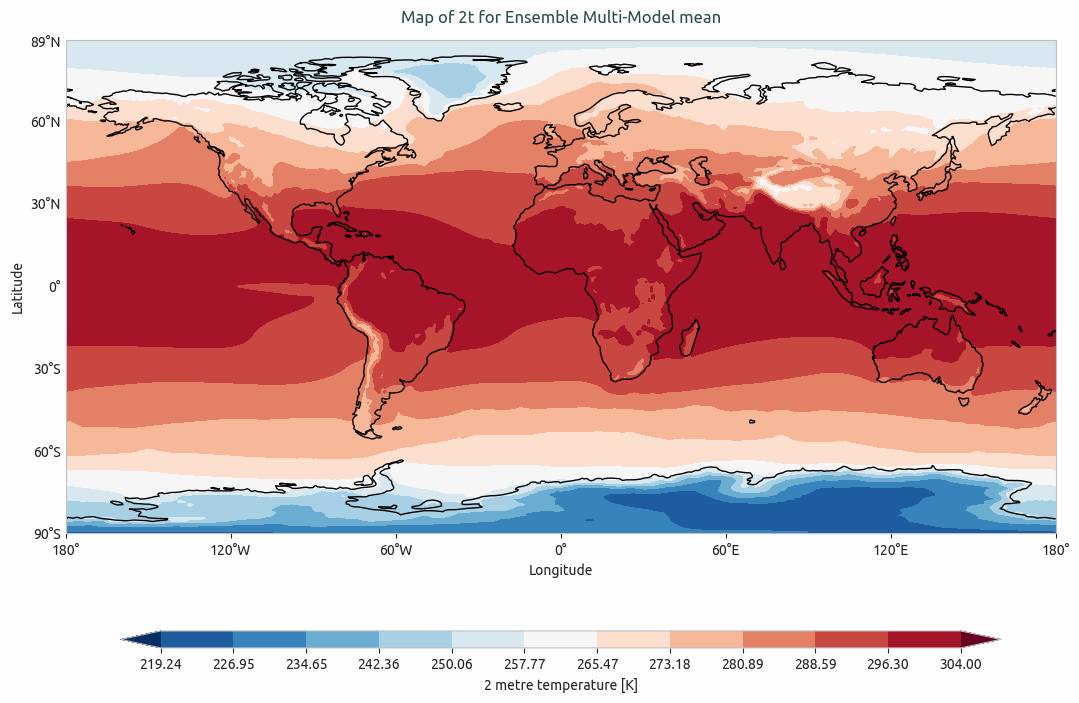

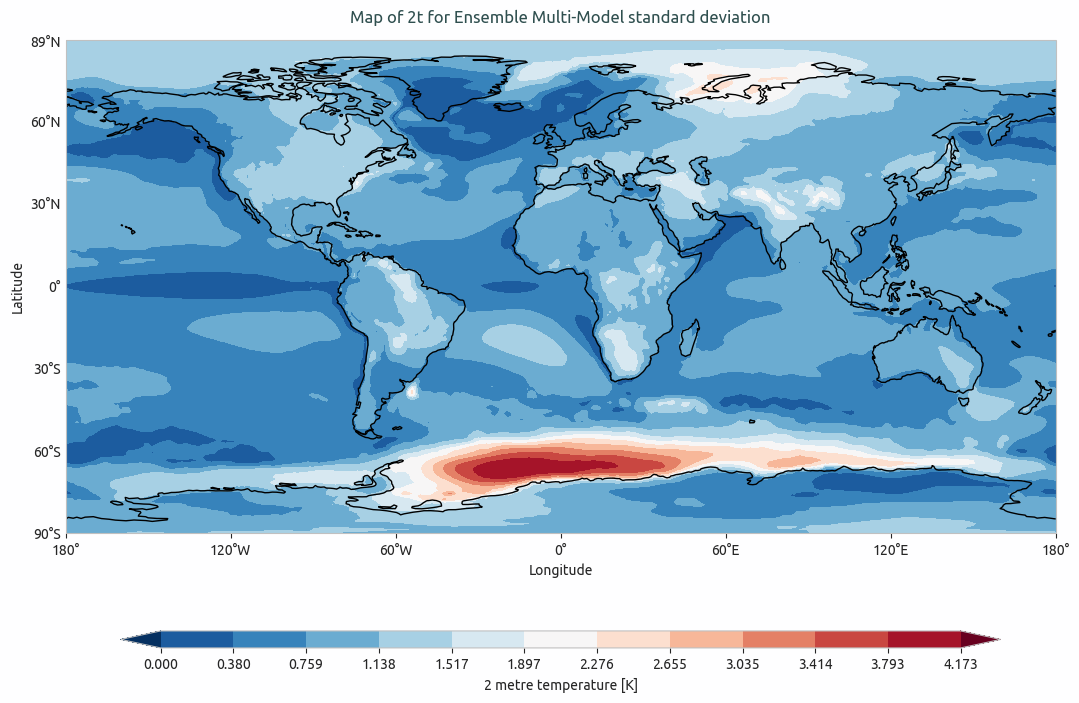

In [12]:
# PlotEnsembleLatLon class
var = '2t'
plot_arguments = {
    "var": var,
    "model_list": ['IFS-FESOM', 'IFS-NEMO'],
    "save_pdf": True,
    "save_png": True,
    "title_mean":  'Map of 2t for Ensemble Multi-Model mean',
    "title_std": 'Map of 2t for Ensemble Multi-Model standard deviation',
    "cbar_label": '2 meter temperature in K',
}

ens_latlon_plot = PlotEnsembleLatLon(
    **plot_arguments,
    dataset_mean=atmglobalmean_ens.dataset_mean,
    dataset_std=atmglobalmean_ens.dataset_std,
    )
ens_latlon_plot.plot()

In [14]:
atmglobalmean_ens.dataset

<xarray.Dataset> Size: 1MB
Dimensions:   (ensemble: 2, lat: 180, lon: 361)
Coordinates:
  * ensemble  (ensemble) int64 16B 0 1
  * lon       (lon) float64 3kB 0.0 1.0 2.0 3.0 4.0 ... 357.0 358.0 359.0 360.0
  * lat       (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    model     (ensemble) <U9 72B 'IFS-FESOM' 'IFS-NEMO'
Data variables:
    2t        (ensemble, lat, lon) float64 1MB 228.9 228.9 228.9 ... 255.7 255.7
Attributes: (12/23)
    GRIB_paramId:                    167
    long_name:                       2 metre temperature
    GRIB_stepUnits:                  1
    GRIB_gridDefinitionDescription:  150
    GRIB_typeOfLevel:                heightAboveGround
    standard_name:                   air_temperature
    ...                              ...
    GRIB_shortName:                  2t
    GRIB_units:                      K
    GRIB_dataType:                   fc
    model_label:                     IFS-FESOM_historical-1990
    description:                     Dataset merged along ensemble for ensemb...
    model names:                     ['IFS-FESOM', 'IFS-NEMO']

In [15]:
atmglobalmean_ens.dataset_std

<xarray.DataArray '2t' (lat: 180, lon: 361)> Size: 520kB
array([[1.06380575, 1.0337967 , 1.03375562, ..., 1.09381116, 1.09379607,
        1.06380575],
       [1.07469302, 1.05811012, 1.05820149, ..., 1.09133029, 1.09133664,
        1.07469302],
       [1.07203348, 1.045261  , 1.04493347, ..., 1.09807046, 1.09836346,
        1.07203348],
       ...,
       [1.35584519, 1.37381886, 1.37344788, ..., 1.33741245, 1.33752601,
        1.35584519],
       [1.34816559, 1.36040753, 1.36020764, ..., 1.33587774, 1.33582135,
        1.34816559],
       [1.34365779, 1.35148137, 1.35145462, ..., 1.33580407, 1.33581059,
        1.34365779]], shape=(180, 361))
Coordinates:
  * lon      (lon) float64 3kB 0.0 1.0 2.0 3.0 4.0 ... 357.0 358.0 359.0 360.0
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
Attributes: (12/31)
    GRIB_paramId:                    167
    long_name:                       2 metre temperature
    GRIB_stepUnits:                  1
    GRIB_gridDefinitionDescription:  150
    GRIB_typeOfLevel:                heightAboveGround
    standard_name:                   air_temperature
    ...                              ...
    var:                             air_temperature
    data_name:                       std
    region:                          None
    timestamp:                       2025-07-15 23:21:38
    aqua_version:                    0.17.0-alpha
    Description:                     ensemble_EnsembleLatLon